# K-nearest Project

## Importing Libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
import plotly.express as px
import plotly.io as pio
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

## Loading Dataset

In [2]:
df = pd.read_csv("../data/raw/winequality-red.csv", sep=";")

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
df["quality"].value_counts().sort_index()

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

In [4]:
# Mapping function

def mapping(value):
    if value <= 4:
        return 0
    elif value <= 6:
        return 1
    else:
        return 2

df["label"] = df["quality"].apply(mapping)

df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,2
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,2
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


Since the dataset does not include a label column, we created it ourselves by converting the original quality scores into three categories. We analyzed the distribution of the quality values and noticed that most wines are rated between 5 and 6, while very few wines appear in the extreme values. To make the classification problem more balanced and meaningful, we mapped quality into three levels:

0 = Low quality (scores 3 and 4)

1 = Medium quality (scores 5 and 6)

2 = High quality (scores 7 and 8)

# EDA

#### Variables

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

12 - quality (TARGET) - mapped into "label"


In [5]:
print('Our dataframe contains {} rows and it has {} features.'.format(len(df), df.shape[1]))

Our dataframe contains 1599 rows and it has 13 features.


### Identifying Duplicated and Null Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  label                 1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


No null values.

In [7]:
df.duplicated().sum()

df = df.drop_duplicates()

df.shape

(1359, 13)

240 duplicate values were found and then dropped.

## Univariate Analysis

### Numerical Variables (all of them)

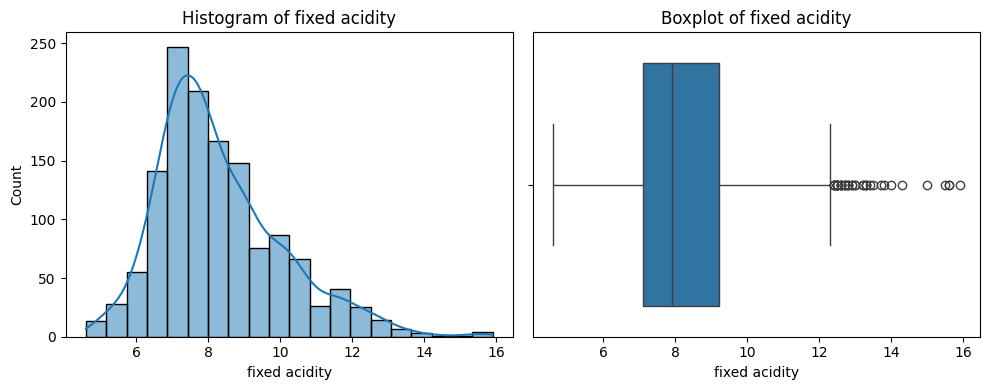

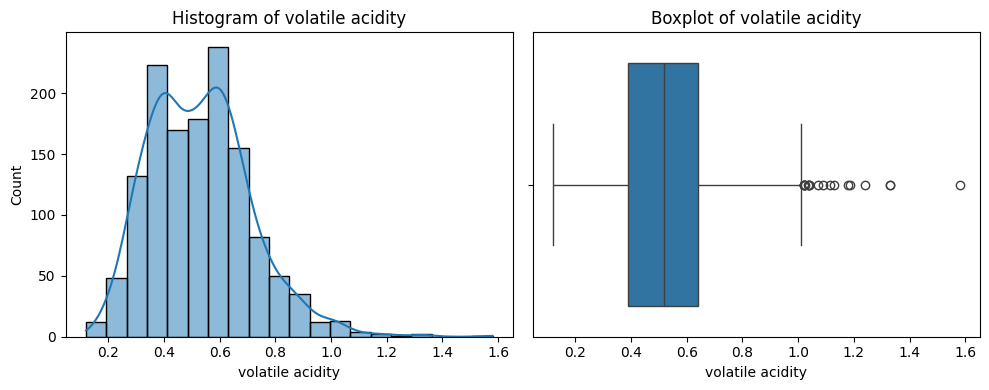

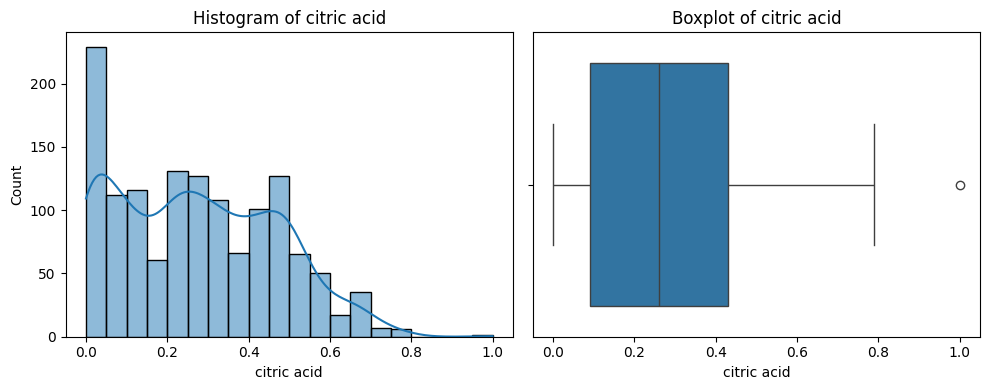

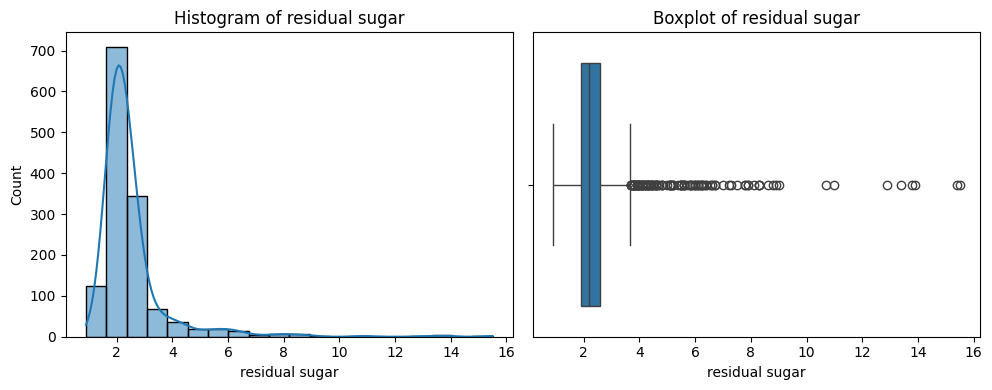

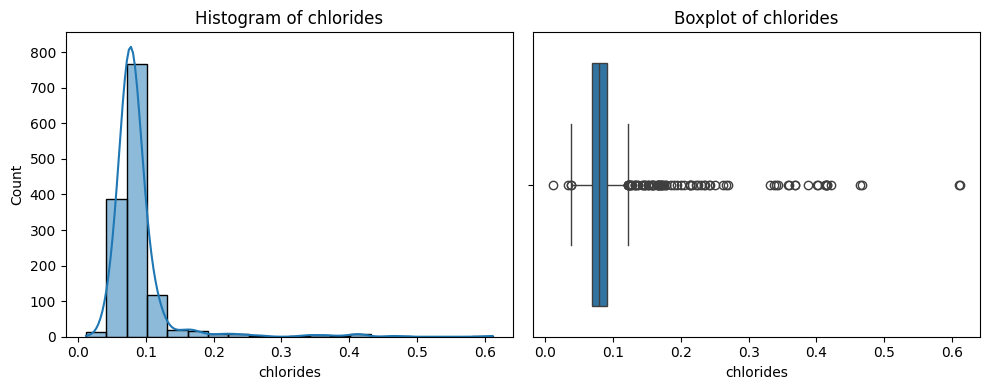

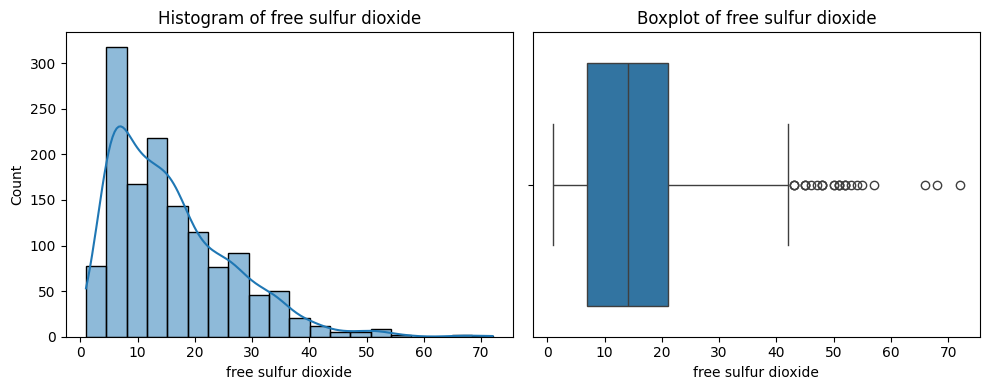

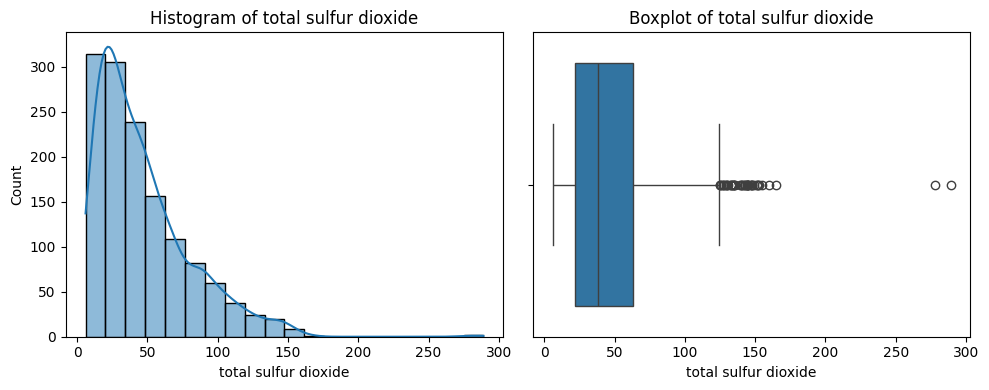

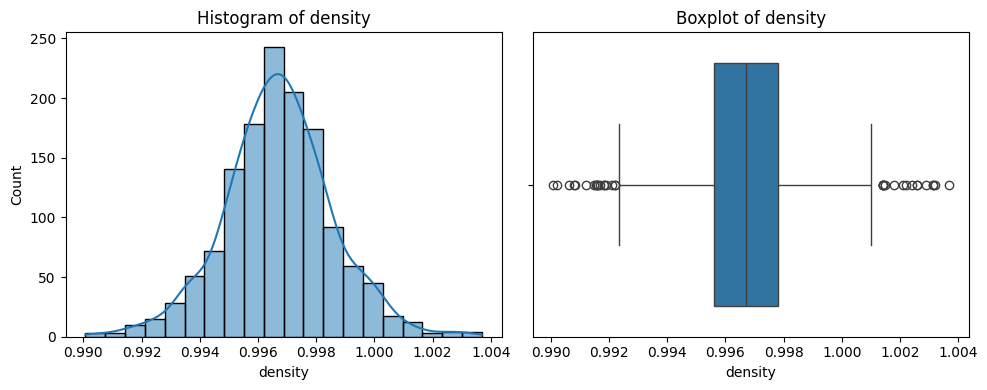

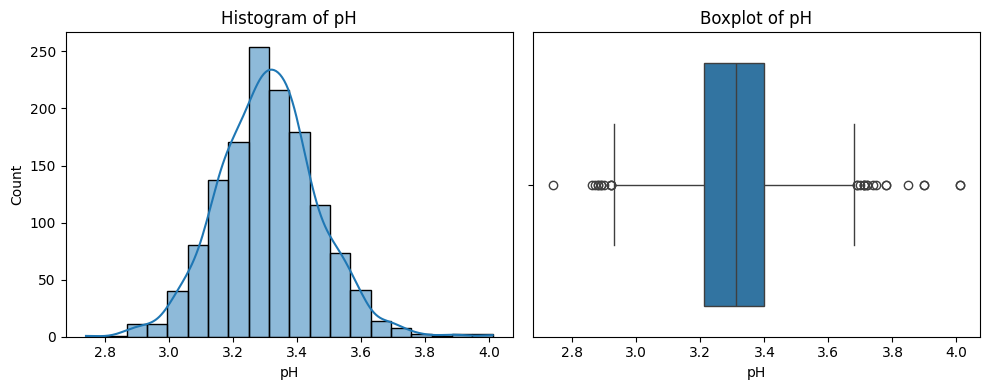

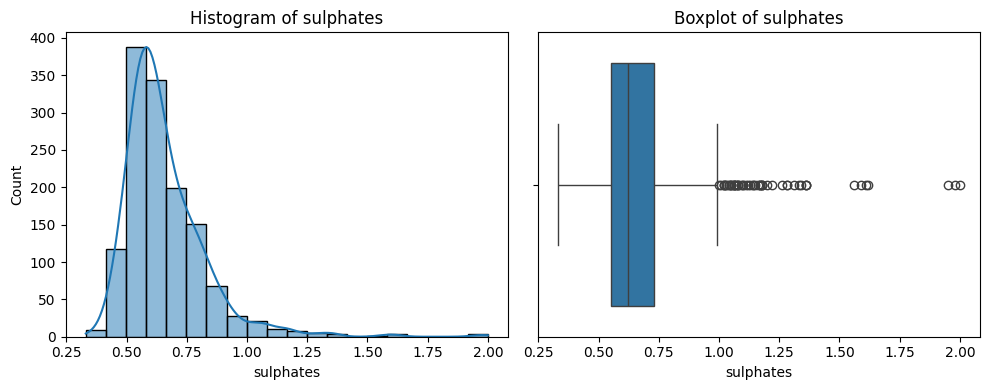

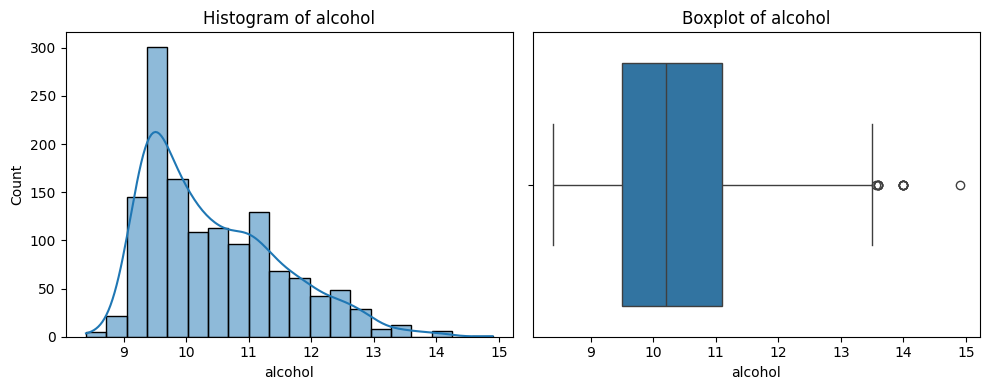

In [8]:
features = df.drop(columns=["quality", "label"])

for column in features.columns:
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(features[column], bins=20, kde=True)
    plt.title(f"Histogram of {column}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=features[column])
    plt.title(f"Boxplot of {column}")

    plt.tight_layout()
    plt.show()

### Conclusions:
Most variables follow a near-normal distribution with little variability.

Several features (residual sugar, chlorides, sulphates, sulfur dioxide) are right-skewed with many outliers, suggesting that a small number of wines have extreme values.

Sulphates and sulfur dioxide also show large variation.

Overall, while some features are stable, others display wide spreads and outliers. 

## Multivariate Analysis

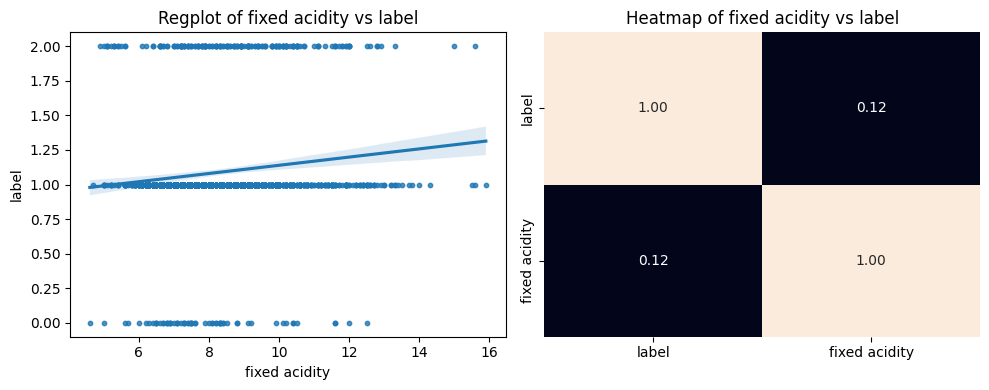

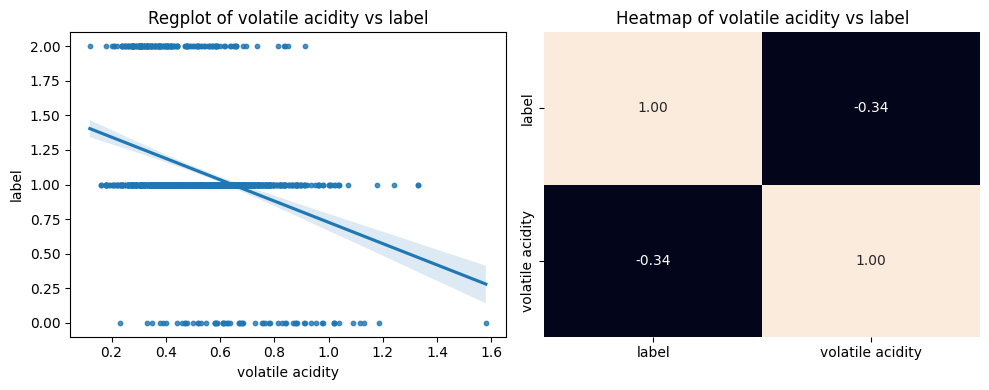

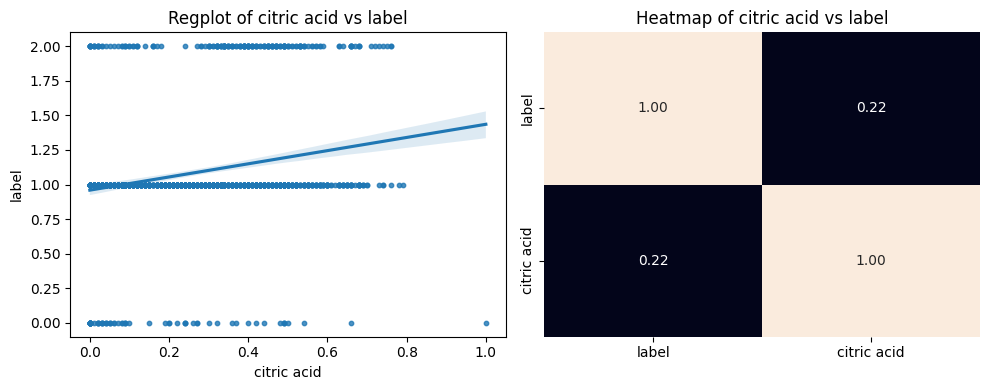

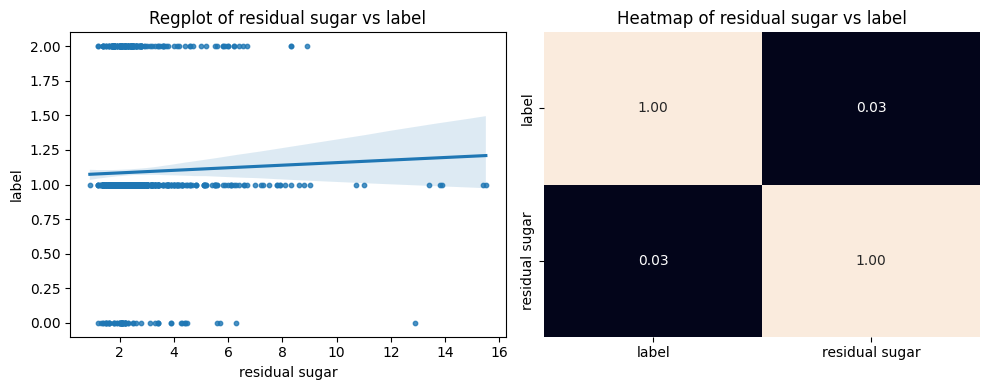

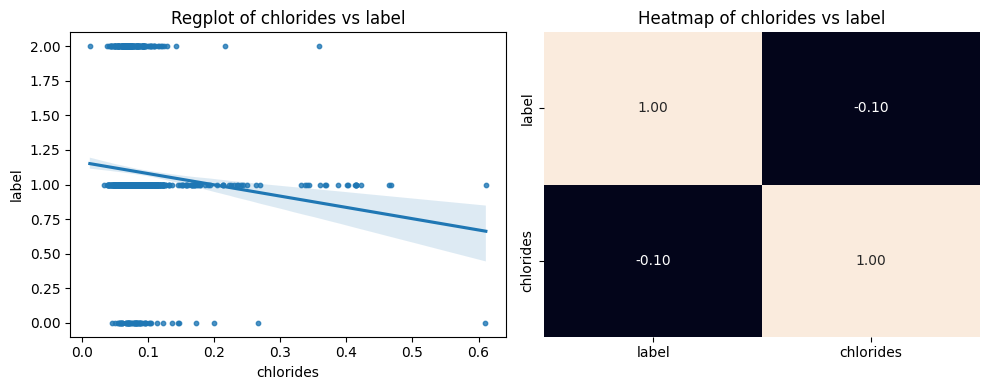

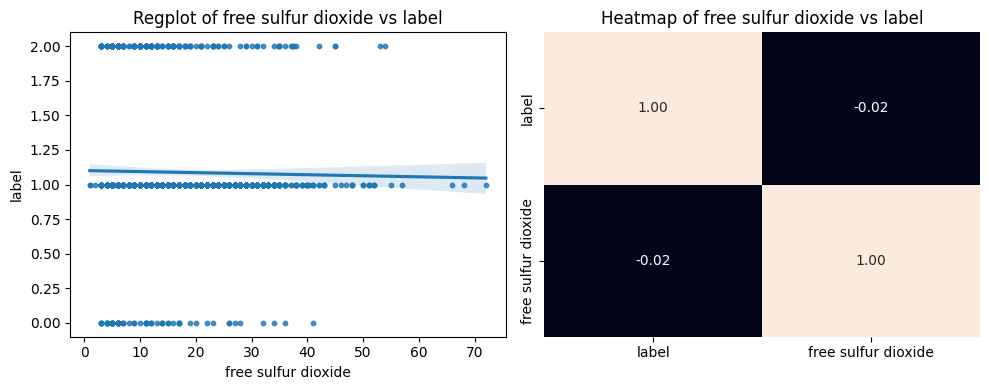

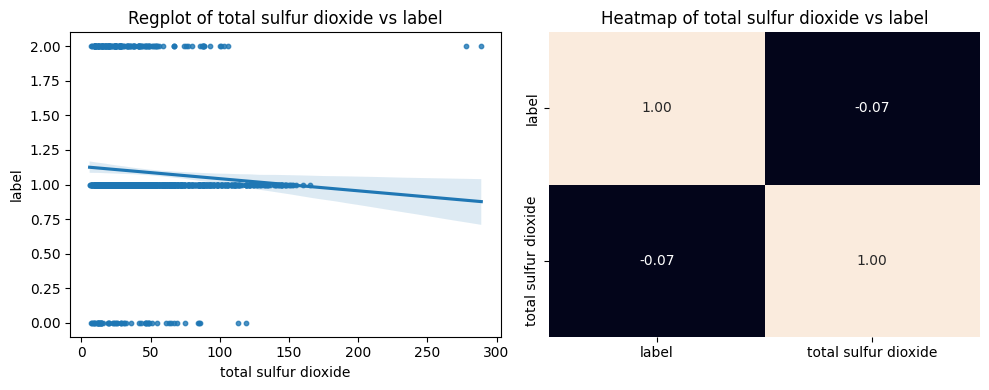

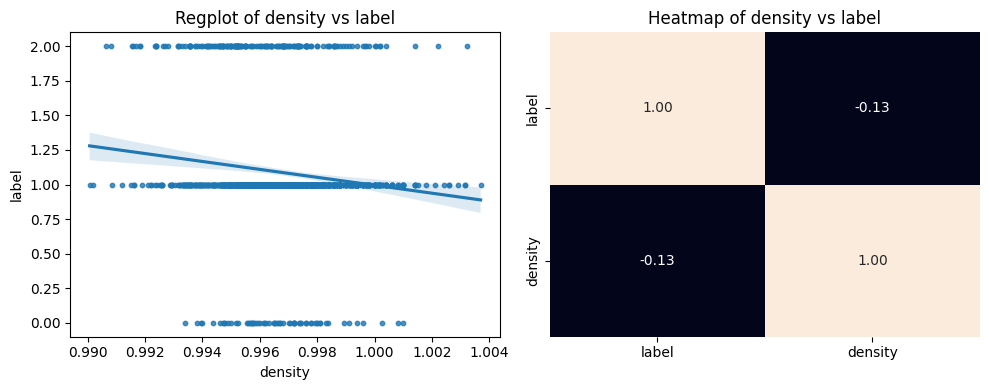

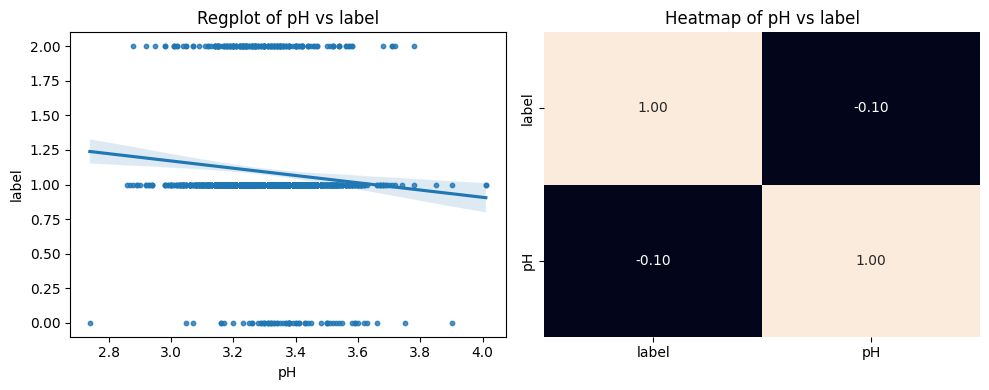

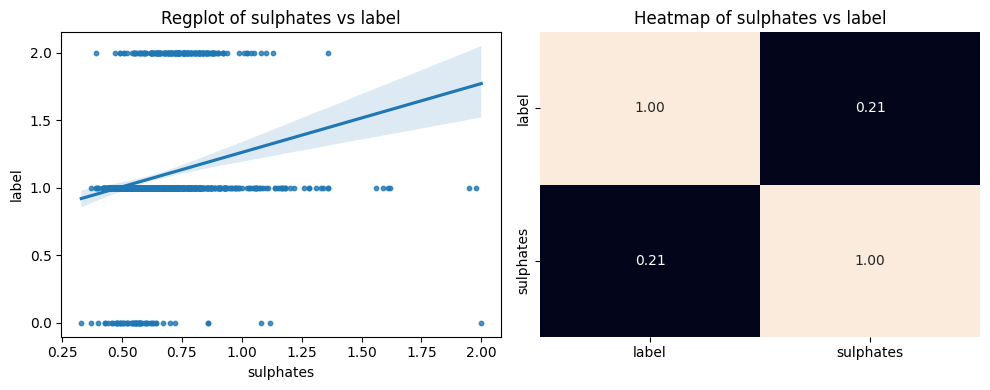

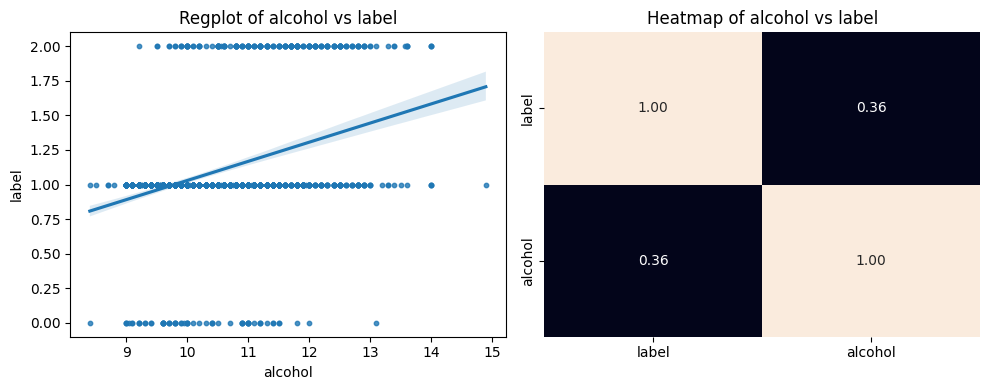

In [9]:
for column in features.columns:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Regplot
    sns.regplot(data=df, x=column, y="label", ax=axes[0], scatter_kws={"s":10})
    axes[0].set_title(f"Regplot of {column} vs label")

    # Heatmap
    corr_matrix = df[["label", column]].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cbar=False, ax=axes[1])
    axes[1].set_title(f"Heatmap of {column} vs label")

    plt.tight_layout()
    plt.show()
    

### Key Findings:

Alcohol, volatile acidity, and sulphates are the main drivers of red wine quality in this dataset, while most other chemical properties show only weak or negligible direct relationships with quality.

### Correlation Heatmap

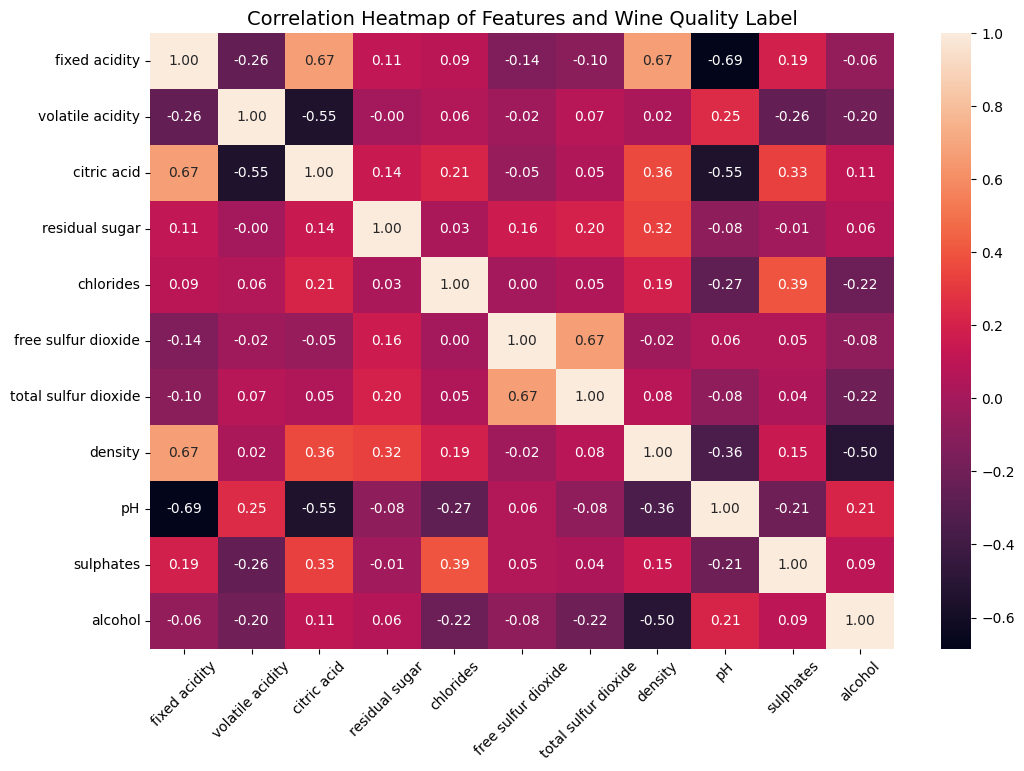

In [10]:
plt.figure(figsize=(12, 8))

sns.heatmap(features.corr(), annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Features and Wine Quality Label", fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Conclusions:
The correlation heatmap highlights important relationships between the chemical properties of wine and its quality label. Among all variables, alcohol shows the strongest positive correlation with quality, suggesting that wines with higher alcohol content are generally perceived as better. Sulphates also contribute positively, indicating that higher sulphate levels may be associated with improved preservation and overall quality. On the other hand, volatile acidity has a clear negative correlation with quality, meaning that higher acidity reduces the likelihood of a wine being considered high quality.
Beyond the direct relationship with the label, some features display strong correlations among themselves. For instance, density and fixed acidity are positively correlated, while pH is strongly and negatively correlated with fixed acidity. Free sulfur dioxide and total sulfur dioxide are also closely linked.

# Feature Engineering

In [11]:
columns_list = features.columns.tolist()
columns_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [12]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252,1.089036
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578,0.417075
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,2.000000


## Outliers

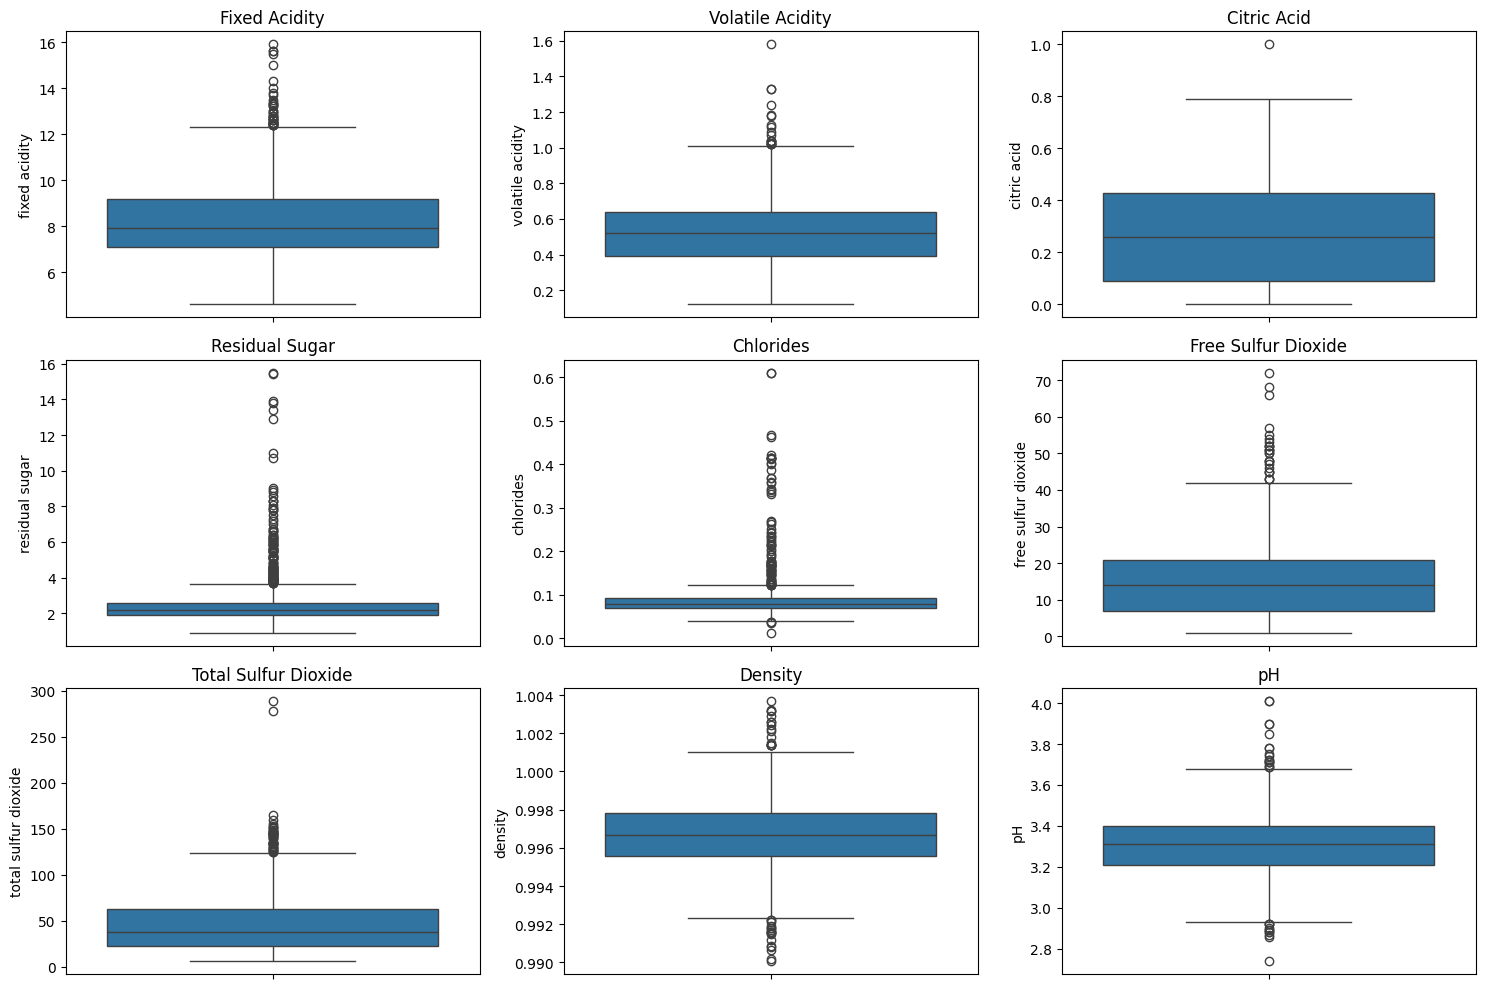

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], data=df, y="fixed acidity")
axis[0, 0].set_title("Fixed Acidity")
sns.boxplot(ax=axis[0, 1], data=df, y="volatile acidity")
axis[0, 1].set_title("Volatile Acidity")
sns.boxplot(ax=axis[0, 2], data=df, y="citric acid")
axis[0, 2].set_title("Citric Acid")
sns.boxplot(ax=axis[1, 0], data=df, y="residual sugar")
axis[1, 0].set_title("Residual Sugar")
sns.boxplot(ax=axis[1, 1], data=df, y="chlorides")
axis[1, 1].set_title("Chlorides")
sns.boxplot(ax=axis[1, 2], data=df, y="free sulfur dioxide")
axis[1, 2].set_title("Free Sulfur Dioxide")
sns.boxplot(ax=axis[2, 0], data=df, y="total sulfur dioxide")
axis[2, 0].set_title("Total Sulfur Dioxide")
sns.boxplot(ax=axis[2, 1], data=df, y="density")
axis[2, 1].set_title("Density")
sns.boxplot(ax=axis[2, 2], data=df, y="pH")
axis[2, 2].set_title("pH")

plt.tight_layout()
plt.show()

## Treating exact outliers

In [14]:
for col in features:
  stats = df[col].describe()
  iqr = stats["75%"] - stats["25%"]
  upper_limit = stats["75%"] + 1.5 * iqr
  lower_limit = stats["25%"] - 1.5 * iqr
  if lower_limit < 0:
    lower_limit = 0
    print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of  {round(iqr, 2)}")



# Saving both datasets:

df_WITH_outliers = df.copy()

df_WITHOUT_outliers = df.copy()

def replace_outliers_from_col(df, col):
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = max(Q1 - 1.5 * IQR, 0)
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)
    return [lower, upper]

outliers_dict = {}
for col in features:
    outliers_dict[col] = replace_outliers_from_col(df_WITHOUT_outliers, col)

outliers_dict

The upper and lower limits for finding outliers are 0.94 and 0, with an interquartile range of  0.34
The upper and lower limits for finding outliers are 42.0 and 0, with an interquartile range of  14.0
The upper and lower limits for finding outliers are 124.5 and 0, with an interquartile range of  41.0


{'fixed acidity': [3.95, 12.349999999999998],
 'volatile acidity': [0.015000000000000013, 1.0150000000000001],
 'citric acid': [0, 0.94],
 'residual sugar': [0.8499999999999996, 3.6500000000000004],
 'chlorides': [0.03850000000000002, 0.12249999999999998],
 'free sulfur dioxide': [0, 42.0],
 'total sulfur dioxide': [0, 124.5],
 'density': [0.99227, 1.00115],
 'pH': [2.925, 3.6849999999999996],
 'sulphates': [0.28000000000000014, 0.9999999999999999],
 'alcohol': [7.1000000000000005, 13.5]}

### Key Findings:
The outlier analysis shows that most features present extreme values, especially free sulfur dioxide (capped at 42) and total sulfur dioxide (capped at 124.5), which had unusually high values in the raw data. Alcohol values were also capped between 7.1% and 13.5%, removing extreme cases. Other variables such as citric acid, residual sugar, chlorides, and sulphates had narrower ranges but still contained outliers.

## Splitting Train and Test

In [15]:
# Dividing data into train and test
#dataset with outliers
X_WITH = df_WITH_outliers[columns_list]
y = df_WITH_outliers["label"]
X_train_with_outliers, X_test_with_outliers, y_train, y_test = train_test_split(X_WITH, y, test_size = 0.2, random_state = 42)

#dataset without outliers
X_WITHOUT = df_WITHOUT_outliers[columns_list]
X_train_without_outliers, X_test_without_outliers = train_test_split(X_WITHOUT, test_size = 0.2, random_state = 42)

X_train_with_outliers.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1016,8.9,0.38,0.40,2.2,0.068,12.0,28.0,0.99486,3.27,0.75,12.6
1519,6.6,0.70,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2
452,6.8,0.56,0.03,1.7,0.084,18.0,35.0,0.99680,3.44,0.63,10.0
847,7.4,0.68,0.16,1.8,0.078,12.0,39.0,0.99770,3.50,0.70,9.9
58,7.8,0.59,0.18,2.3,0.076,17.0,54.0,0.99750,3.43,0.59,10.0


## Scaling

In [16]:
scaler = StandardScaler()

# data WITH outliers
X_train_with_scaled = scaler.fit_transform(X_train_with_outliers)
X_test_with_scaled = scaler.transform(X_test_with_outliers)

# data WITHOUT outliers
X_train_without_scaled = scaler.fit_transform(X_train_without_outliers)
X_test_without_scaled = scaler.transform(X_test_without_outliers)

## Initialization and training of the model


Unscaled with outliers Accuracy: 0.8346


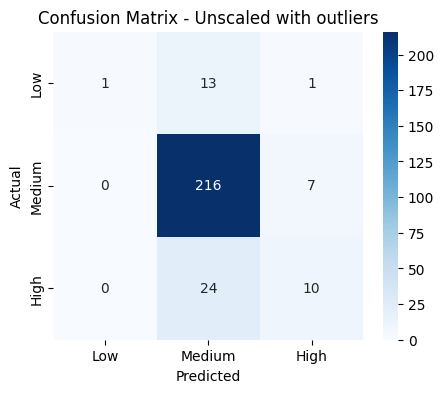

Classification Report - Unscaled with outliers
              precision    recall  f1-score   support

         Low       1.00      0.07      0.12        15
      Medium       0.85      0.97      0.91       223
        High       0.56      0.29      0.38        34

    accuracy                           0.83       272
   macro avg       0.80      0.44      0.47       272
weighted avg       0.82      0.83      0.80       272


Unscaled without outliers Accuracy: 0.8419


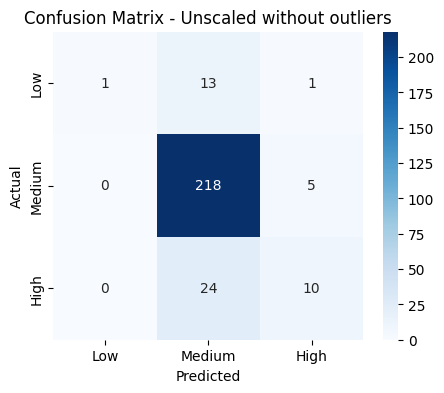

Classification Report - Unscaled without outliers
              precision    recall  f1-score   support

         Low       1.00      0.07      0.12        15
      Medium       0.85      0.98      0.91       223
        High       0.62      0.29      0.40        34

    accuracy                           0.84       272
   macro avg       0.83      0.45      0.48       272
weighted avg       0.83      0.84      0.80       272


Scaled with outliers Accuracy: 0.8199


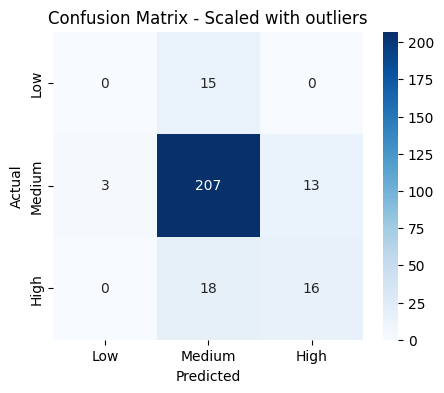

Classification Report - Scaled with outliers
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        15
      Medium       0.86      0.93      0.89       223
        High       0.55      0.47      0.51        34

    accuracy                           0.82       272
   macro avg       0.47      0.47      0.47       272
weighted avg       0.78      0.82      0.80       272


Scaled without outliers Accuracy: 0.8272


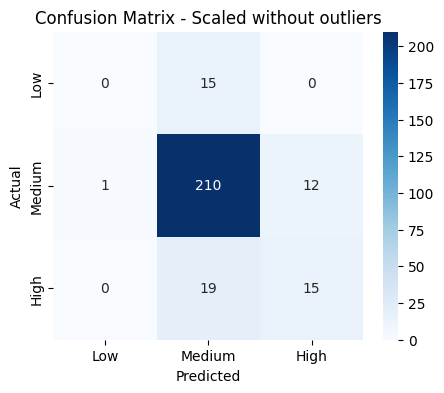

Classification Report - Scaled without outliers
              precision    recall  f1-score   support

         Low       0.00      0.00      0.00        15
      Medium       0.86      0.94      0.90       223
        High       0.56      0.44      0.49        34

    accuracy                           0.83       272
   macro avg       0.47      0.46      0.46       272
weighted avg       0.78      0.83      0.80       272



In [30]:
def evaluate_knn(X_train, X_test, y_train, y_test, description):
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{description} Accuracy: {acc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {description}")
    plt.show()

    # Classification Report
    print(f"Classification Report - {description}")
    print(classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))

evaluate_knn(X_train_with_outliers, X_test_with_outliers, y_train, y_test, "Unscaled with outliers")
evaluate_knn(X_train_without_outliers, X_test_without_outliers, y_train, y_test, "Unscaled without outliers")
evaluate_knn(X_train_with_scaled, X_test_with_scaled, y_train, y_test, "Scaled with outliers")
evaluate_knn(X_train_without_scaled, X_test_without_scaled, y_train, y_test, "Scaled without outliers")

### Conclusions:
The KNN model reached accuracies between 0.82 and 0.84 across all scenarios. The best performance came from the unscaled dataset without outliers (0.842), followed closely by the unscaled dataset with outliers (0.835). When scaling was applied, performance slightly dropped, with accuracies of 0.820 (scaled with outliers) and 0.827 (scaled without outliers).
Looking at the confusion matrices and reports, the model consistently predicted the medium-quality wines correctly, which makes sense given that they dominate the dataset. However, it struggled with the low- and high-quality wines, misclassifying most of them as medium. Removing outliers gave a small benefit, especially for high-quality wines, while scaling did not improve results and, in fact, reduced the model’s ability to detect minority classes.

## Optimization

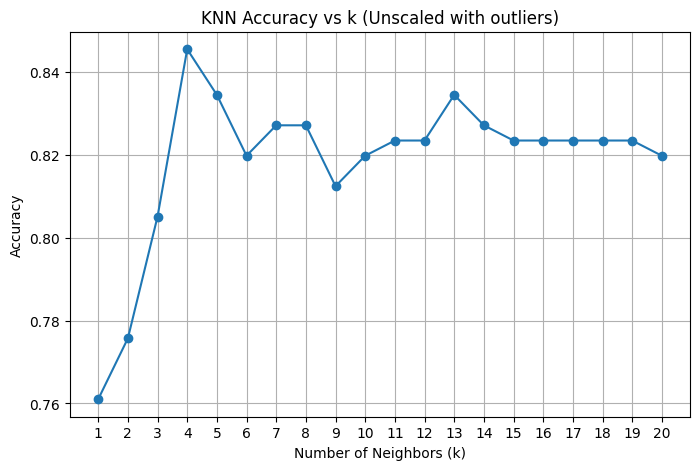

Best k for Unscaled with outliers: 4 with accuracy 0.8456


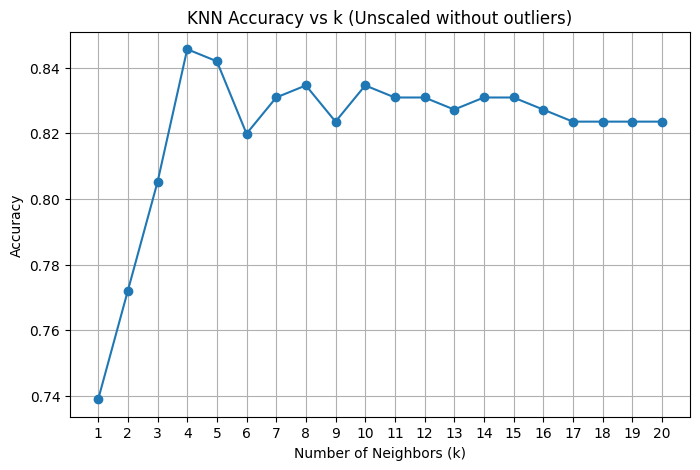

Best k for Unscaled without outliers: 4 with accuracy 0.8456


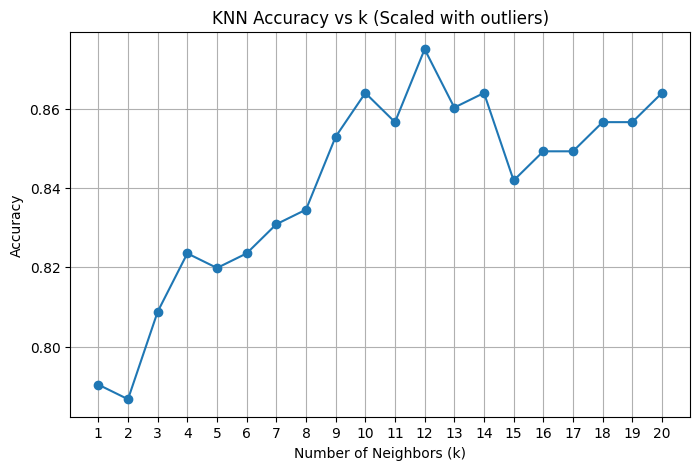

Best k for Scaled with outliers: 12 with accuracy 0.8750


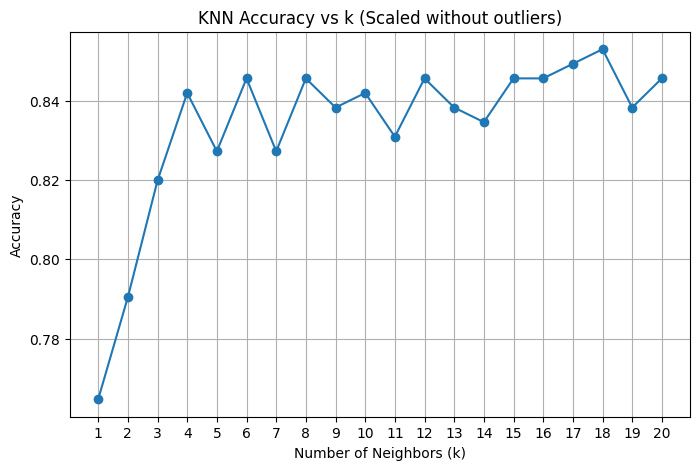

Best k for Scaled without outliers: 18 with accuracy 0.8529


In [36]:
def optimize_k(X_train, X_test, y_train, y_test, description, max_k=20):
    accuracies = []
    
    for k in range(1, max_k+1):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    
    # Plot results
    plt.figure(figsize=(8,5))
    plt.plot(range(1, max_k+1), accuracies, marker='o', linestyle='-')
    plt.title(f"KNN Accuracy vs k ({description})")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Accuracy")
    plt.xticks(range(1, max_k+1))
    plt.grid(True)
    plt.show()
    
    # Best k
    best_k = accuracies.index(max(accuracies)) + 1
    best_acc = max(accuracies)
    print(f"Best k for {description}: {best_k} with accuracy {best_acc:.4f}")
    
    return best_k, accuracies



# Unscaled with outliers
best_k_with_unscaled, acc_with_unscaled = optimize_k(
    X_train_with_outliers, X_test_with_outliers, y_train, y_test, 
    "Unscaled with outliers"
)

# Unscaled without outliers
best_k_without_unscaled, acc_without_unscaled = optimize_k(
    X_train_without_outliers, X_test_without_outliers, y_train, y_test, 
    "Unscaled without outliers"
)

# Scaled with outliers
best_k_with_scaled, acc_with_scaled = optimize_k(
    X_train_with_scaled, X_test_with_scaled, y_train, y_test, 
    "Scaled with outliers"
)

# Scaled without outliers
best_k_without_scaled, acc_without_scaled = optimize_k(
    X_train_without_scaled, X_test_without_scaled, y_train, y_test, 
    "Scaled without outliers"
)

# Final Conclusions

The KNN model was able to classify the wines with a good level of accuracy. When comparing the different approaches, scaling the data clearly made the biggest difference, since KNN depends on distances between points. Outlier removal didn’t have much impact.

The best result came from the scaled dataset with outliers, which reached about 87.5% accuracy at k = 12. The unscaled versions stayed closer to 84%.

This shows that features like alcohol, sulphates and volatile acidity carry enough information for the model to separate low, medium and high quality wines quite well.